<a href="https://colab.research.google.com/github/venkatchintha/ObjectDetection/blob/master/mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 7199 (delta 34), reused 71 (delta 14), pack-reused 7085
Receiving objects: 100% (7199/7199), 220.76 MiB | 34.41 MiB/s, done.
Resolving deltas: 100% (2854/2854), done.
Checking out files: 100% (6327/6327), done.


In [3]:
! cd Monk_Object_Detection/8_pytorch_rfbnet/installation && chmod +x install_colab.sh && ./install_colab.sh

  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17452 sha256=4119982e510c9767789d295280a85ab4fa652936b5c7f202f363286a5e1f05fb
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml
     |████████████████████████████████| 317kB 6.3MB/s 
running build_ext
skipping 'nms/cpu_nms.c' Cython extension (up-to-date)
skipping 'nms/gpu_nms.cpp' Cython extension (up-to-date)
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'nms.cpu_nms' extension
{'gcc': ['-Wno-cpp', '-Wno-unused-function']}
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I/usr/include/python3.6m -c nms/cpu_nms.c -o build/temp.linux-x86_64-3.6/nms/cpu_nms.o -Wno-cpp -Wno-unused-function
x86_64-linux-gnu-gcc -pthread -shared -Wl,-O1

In [20]:
import os
import sys
sys.path.append("Monk_Object_Detection/8_pytorch_rfbnet/lib/");

In [21]:
from train_detector import Detector

In [22]:
gtf = Detector();

In [23]:

root_dir = "/content/drive/My Drive/Kaggle/";
coco_dir = "nexet";
set_dir = "nexet_2017_1";

In [24]:
gtf.Train_Dataset(root_dir, coco_dir, set_dir, batch_size=4,image_size=300, num_workers=3)

In [25]:
gtf.Model(model_name="mobilenet", use_gpu=True, ngpu=1);

In [26]:
gtf.Set_HyperParams(lr=0.0001, momentum=0.9, weight_decay=0.0005, gamma=0.1, jaccard_threshold=0.5)

In [27]:
gtf.Train(epochs=5, log_iters=True, output_weights_dir="weights", saved_epoch_interval=10);

Loading base network...
Initializing weights...
Loading Dataset...
loading annotations into memory...
Done (t=17.40s)
creating index...
index created!
wrote gt roidb to /content/coco_cache/contentdriveMy DriveKaggle_nexet_nexet_2017_1_gt_roidb.pkl
Training RFB_mobile on COCO


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Streaming output truncated to the last 5000 lines.
Epoch:1 || epochiter: 11610/12320|| Current iter 11610|| Total iter 61600 || L: 2.9929 C: 4.0373||Batch time: 0.0437 sec. ||LR: 0.00001966
Epoch:1 || epochiter: 11620/12320|| Current iter 11620|| Total iter 61600 || L: 1.5357 C: 2.8326||Batch time: 0.0438 sec. ||LR: 0.00001968
Epoch:1 || epochiter: 11630/12320|| Current iter 11630|| Total iter 61600 || L: 1.8921 C: 4.9592||Batch time: 0.0495 sec. ||LR: 0.00001969
Epoch:1 || epochiter: 11640/12320|| Current iter 11640|| Total iter 61600 || L: 2.4137 C: 3.3681||Batch time: 0.0461 sec. ||LR: 0.00001971
Epoch:1 || epochiter: 11650/12320|| Current iter 11650|| Total iter 61600 || L: 2.0276 C: 3.4901||Batch time: 1.6720 sec. ||LR: 0.00001972
Epoch:1 || epochiter: 11660/12320|| Current iter 11660|| Total iter 61600 || L: 2.8112 C: 3.4290||Batch time: 0.4054 sec. ||LR: 0.00001974
Epoch:1 || epochiter: 11670/12320|| Current iter 11670|| Total iter 61600 || L: 2.0985 C: 3.4495||Batch time: 0.051

In [28]:
import os
import sys
sys.path.append("Monk_Object_Detection/8_pytorch_rfbnet/lib/");

In [29]:
from infer_detector import Infer

In [30]:
gtf = Infer();

In [31]:
!ls


coco_cache   drive		    sample_data  weights.zip
download.sh  Monk_Object_Detection  weights


In [32]:
gtf.Model(model_name="mobilenet", weights="/content/weights/Final_RFB_mobile_COCO.pth", use_gpu=True)

In [33]:
class_file = "/content/drive/My Drive/Kaggle/nexet/annotations/classes.txt"
gtf.Image_Params(class_file, input_size=300)

In [34]:
gtf.Setup();

Finished loading model!


4 2


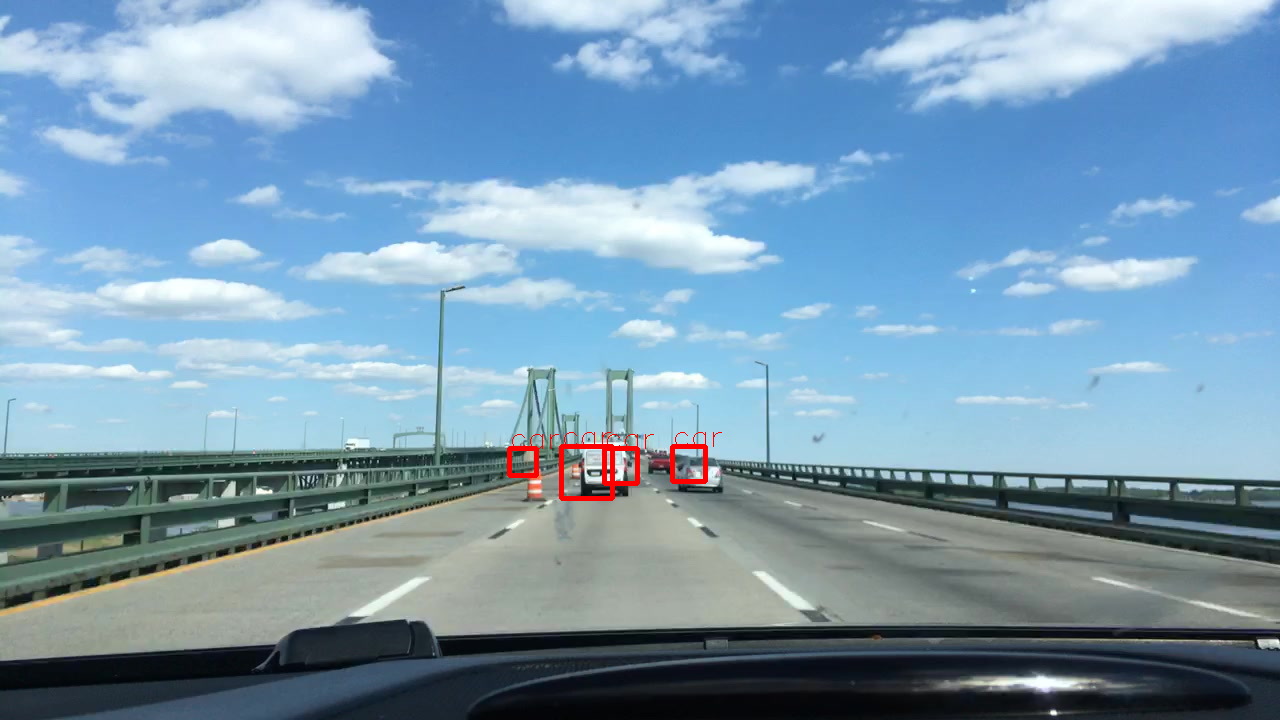

In [46]:
img_path = "/content/drive/My Drive/Kaggle/nexet/Test_images/4fede1f4-5a0d-4084-9d90-55d188b7ecba.mov-0001.jpg";
output = gtf.Predict(img_path, thresh=0.2, font_size=1, line_size=3)
from IPython.display import Image
Image(filename='output.png')

4 2


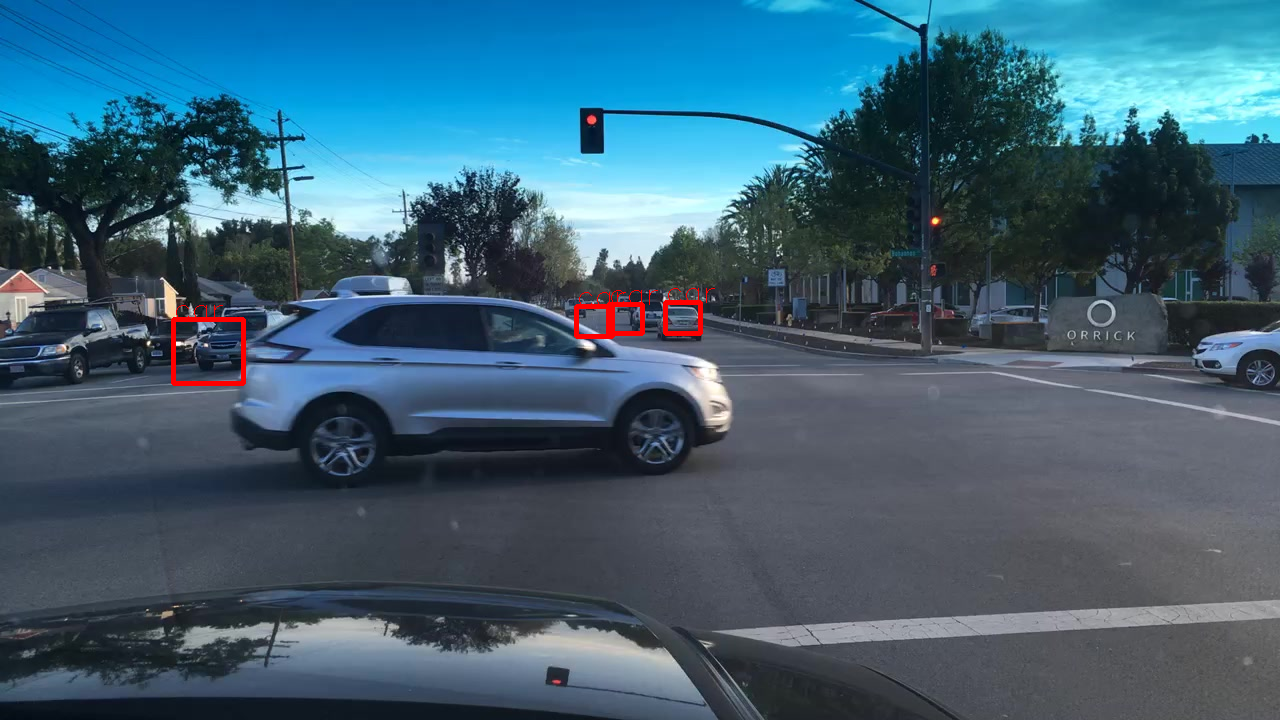

In [53]:
img_path = "/content/drive/My Drive/Kaggle/nexet/Test_images/fe14e9d2-44ab-4ff4-bdd5-7186b11b54c3.mov-0001.jpg";
output = gtf.Predict(img_path, thresh=0.13, font_size=1, line_size=3)
from IPython.display import Image
Image(filename='output.png')